# Pathway Enrichment Analysis 
Using KEGG analysis to explore enriched pathways from DMGs identified in pairwise comparisons with HC (hypoxic control) 

#### load and prep data frames

In [3]:
# loading libraries
library(topGO)
library(KEGGREST)
library(dplyr)
library(clusterProfiler)
library(ggridges)
library(ggplot2)
library(httr)

In [4]:
# importing csv files

#1 control control vs. hypoxic control
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HC.csv')

#2 control hypoxic vs. hypoxic control
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CH_vs_HC.csv')

#3 hypoxic hypoxic vs. hypoxic control
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_HC.csv')


## control control vs. hypoxic control
CC vs. HC

In [4]:
head(CC_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111120752,0.3456118,-0.04195790,0.2300421,0,1,NA
2,LOC111109452,1.5973302,-0.09288309,0.2529871,0,1,NA
3,LOC111124802,213.0013054,0.06672759,0.1192547,0,1,1
4,LOC111101273,76.7130208,-0.20267259,0.1576994,0,1,1
5,LOC111101250,123.4748149,-0.13501125,0.1799700,0,1,1
6,LOC111101262,269.4443993,0.14318006,0.1234759,0,1,1


formatting the df as needed to run KEGG

In [5]:
# selecting columns I need
cc_hc <- select(CC_HC, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
cc_hc$X <- substr(cc_hc$X, start = 4, stop = nchar(cc_hc$X))

# renaming columns
colnames(cc_hc) <- c('gene', 'lfc', 'padj')

head(cc_hc)

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
1,111120752,-0.04195790,NA
2,111109452,-0.09288309,NA
3,111124802,0.06672759,1
4,111101273,-0.20267259,1
5,111101250,-0.13501125,1
6,111101262,0.14318006,1


In [6]:
# creating numeric vector for kegg object
CC_kegg_gene_list <- cc_hc$lfc
names(CC_kegg_gene_list) <- cc_hc$gene

# omitting anything with NA in a cell
CC_kegg_gene_list <- na.omit(CC_kegg_gene_list)

# sort list in descending order
CC_kegg_gene_list = sort(CC_kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(CC_kegg_gene_list)
class(CC_kegg_gene_list)

111129122 111100699 111130929 111129146 111136327 111130870 
 1.893684  1.429007  1.418989  1.395451  1.394858  1.381530

[1] "numeric"

now that my gene list looks okay - running KEGG

In [7]:
kegg_organism = 'cvn'
CC_kk2 <- gseKEGG(geneList = CC_kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

Reading KEGG annotation online: "https://rest.kegg.jp/link/cvn/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/cvn"...

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [10]:
CC_kk2_df <- as.data.frame(CC_kk2)
CC_kk2_df$Description <- sub(" -.*", "", CC_kk2_df$Description)
head(CC_kk2_df)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,11,0.7847989,1.980242,0.0005798551,0.07074233,0.07019299,1855,"tags=73%, list=14%, signal=63%",111113990/111115744/111127642/111136066/111123661/111107112/111115745/111136438
cvn00310,cvn00310,Lysine degradation,31,-0.5216369,-1.579220,0.0125270455,0.66371146,0.65855754,1860,"tags=32%, list=14%, signal=28%",111130627/111109254/111115614/111130119/111121380/111125659/111107127/111110608/111112920/111128625
cvn00591,cvn00591,Linoleic acid metabolism,11,0.6158160,1.553857,0.0342321447,0.66371146,0.65855754,3475,"tags=55%, list=26%, signal=41%",111127642/111123661/111127589/111127588/111121119/111111230
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,18,0.5444173,1.549269,0.0345683297,0.66371146,0.65855754,2069,"tags=44%, list=15%, signal=38%",111113990/111115744/111129730/111136066/111107112/111115745/111136438/111131209
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,57,-0.4211890,-1.421319,0.0358166189,0.66371146,0.65855754,3013,"tags=39%, list=22%, signal=30%",111103436/111122686/111102690/111134591/111123620/111119396/111128896/111123381/111112561/111102803/111105066/111110086/111119458/111125104/111128153/111121480/111132055/111119695/111128265/111120056/111128132/111133163
cvn04068,cvn04068,FoxO signaling pathway,66,-0.4086433,-1.410737,0.0380818054,0.66371146,0.65855754,2298,"tags=38%, list=17%, signal=32%",111128693/111125223/111121739/111121135/111134642/111118834/111131500/111112841/111126185/111103474/111119108/111130138/111105462/111121839/111107163/111120632/111113171/111134713/111102390/111119905/111121740/111120947/111112940/111128744/111104196


the code below takes a long time to run - should only be run once, then have the resulting df saved into a csv to just call back for analysis afterwords

generated with help of ChatGPT
Function to get pathway names
```get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```
generated with help of ChatGPT
```
gseKEGG_df <- select(CC_kk2_df, ID, Description, enrichmentScore, p.adj)
```
Function to apply to each KEGG ID in the dataframe
```
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)
```
Combine pathway info into a dataframe
```
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')
```
Combine pathway info with original dataframe
```
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)
```
Print the dataframe
```
head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)
```
cleaning up GeneralPathway column to only include the pathway name and not CLASS
```
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column
```
also changing DetailedPathway into character instead of list to be able to write csv
```
df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)
```

In [106]:
gseKEGG_df <- select(CC_kk2_df, ID, Description, enrichmentScore, p.adjust)

pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)

pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')

gseKEGG_df <- cbind(gseKEGG_df, pathway_df)

head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)

column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column

df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)


,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<list>,<list>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.7847989,0.07074233,CLASS ....,Lipid me....
cvn00310,cvn00310,Lysine degradation,-0.5216369,0.66371146,CLASS ....,Amino ac....
cvn00591,cvn00591,Linoleic acid metabolism,0.6158160,0.66371146,CLASS ....,Lipid me....
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5444173,0.66371146,CLASS ....,Lipid me....
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,-0.4211890,0.66371146,CLASS ....,Translation
cvn04068,cvn04068,FoxO signaling pathway,-0.4086433,0.66371146,CLASS ....,Signal t....


,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.7847989,0.07074233,Metabolism,Lipid metabolism
cvn00310,cvn00310,Lysine degradation,-0.5216369,0.66371146,Metabolism,Amino acid metabolism
cvn00591,cvn00591,Linoleic acid metabolism,0.6158160,0.66371146,Metabolism,Lipid metabolism
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5444173,0.66371146,Metabolism,Lipid metabolism
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,-0.4211890,0.66371146,Genetic Information Processing,Translation
cvn04068,cvn04068,FoxO signaling pathway,-0.4086433,0.66371146,Environmental Information Processing,Signal transduction


In [107]:
CC_df <- df
head(CC_df)
write.csv(CC_df, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_CC_HC.csv')

,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.7847989,0.07074233,Metabolism,Lipid metabolism
cvn00310,cvn00310,Lysine degradation,-0.5216369,0.66371146,Metabolism,Amino acid metabolism
cvn00591,cvn00591,Linoleic acid metabolism,0.6158160,0.66371146,Metabolism,Lipid metabolism
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5444173,0.66371146,Metabolism,Lipid metabolism
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,-0.4211890,0.66371146,Genetic Information Processing,Translation
cvn04068,cvn04068,FoxO signaling pathway,-0.4086433,0.66371146,Environmental Information Processing,Signal transduction


In [67]:
CC_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_CC_HC.csv')

In [72]:
# making sure R see enrichment score as a number
CC_df$enrichmentScore <- as.numeric(CC_df$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
CC_df$direction <- ifelse(CC_df$enrichmentScore<0, "CC", #neg ES = pathway for control
                              ifelse(CC_df$enrichmentScore>0, "HC", # pos ES = pathway for warm
                                     "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(CC_df)

,X,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway,direction
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.7847989,0.07074233,Metabolism,Lipid metabolism,HC
2,cvn00310,cvn00310,Lysine degradation,-0.5216369,0.66371146,Metabolism,Amino acid metabolism,CC
3,cvn00591,cvn00591,Linoleic acid metabolism,0.6158160,0.66371146,Metabolism,Lipid metabolism,HC
4,cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5444173,0.66371146,Metabolism,Lipid metabolism,HC
5,cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,-0.4211890,0.66371146,Genetic Information Processing,Translation,CC
6,cvn04068,cvn04068,FoxO signaling pathway,-0.4086433,0.66371146,Environmental Information Processing,Signal transduction,CC


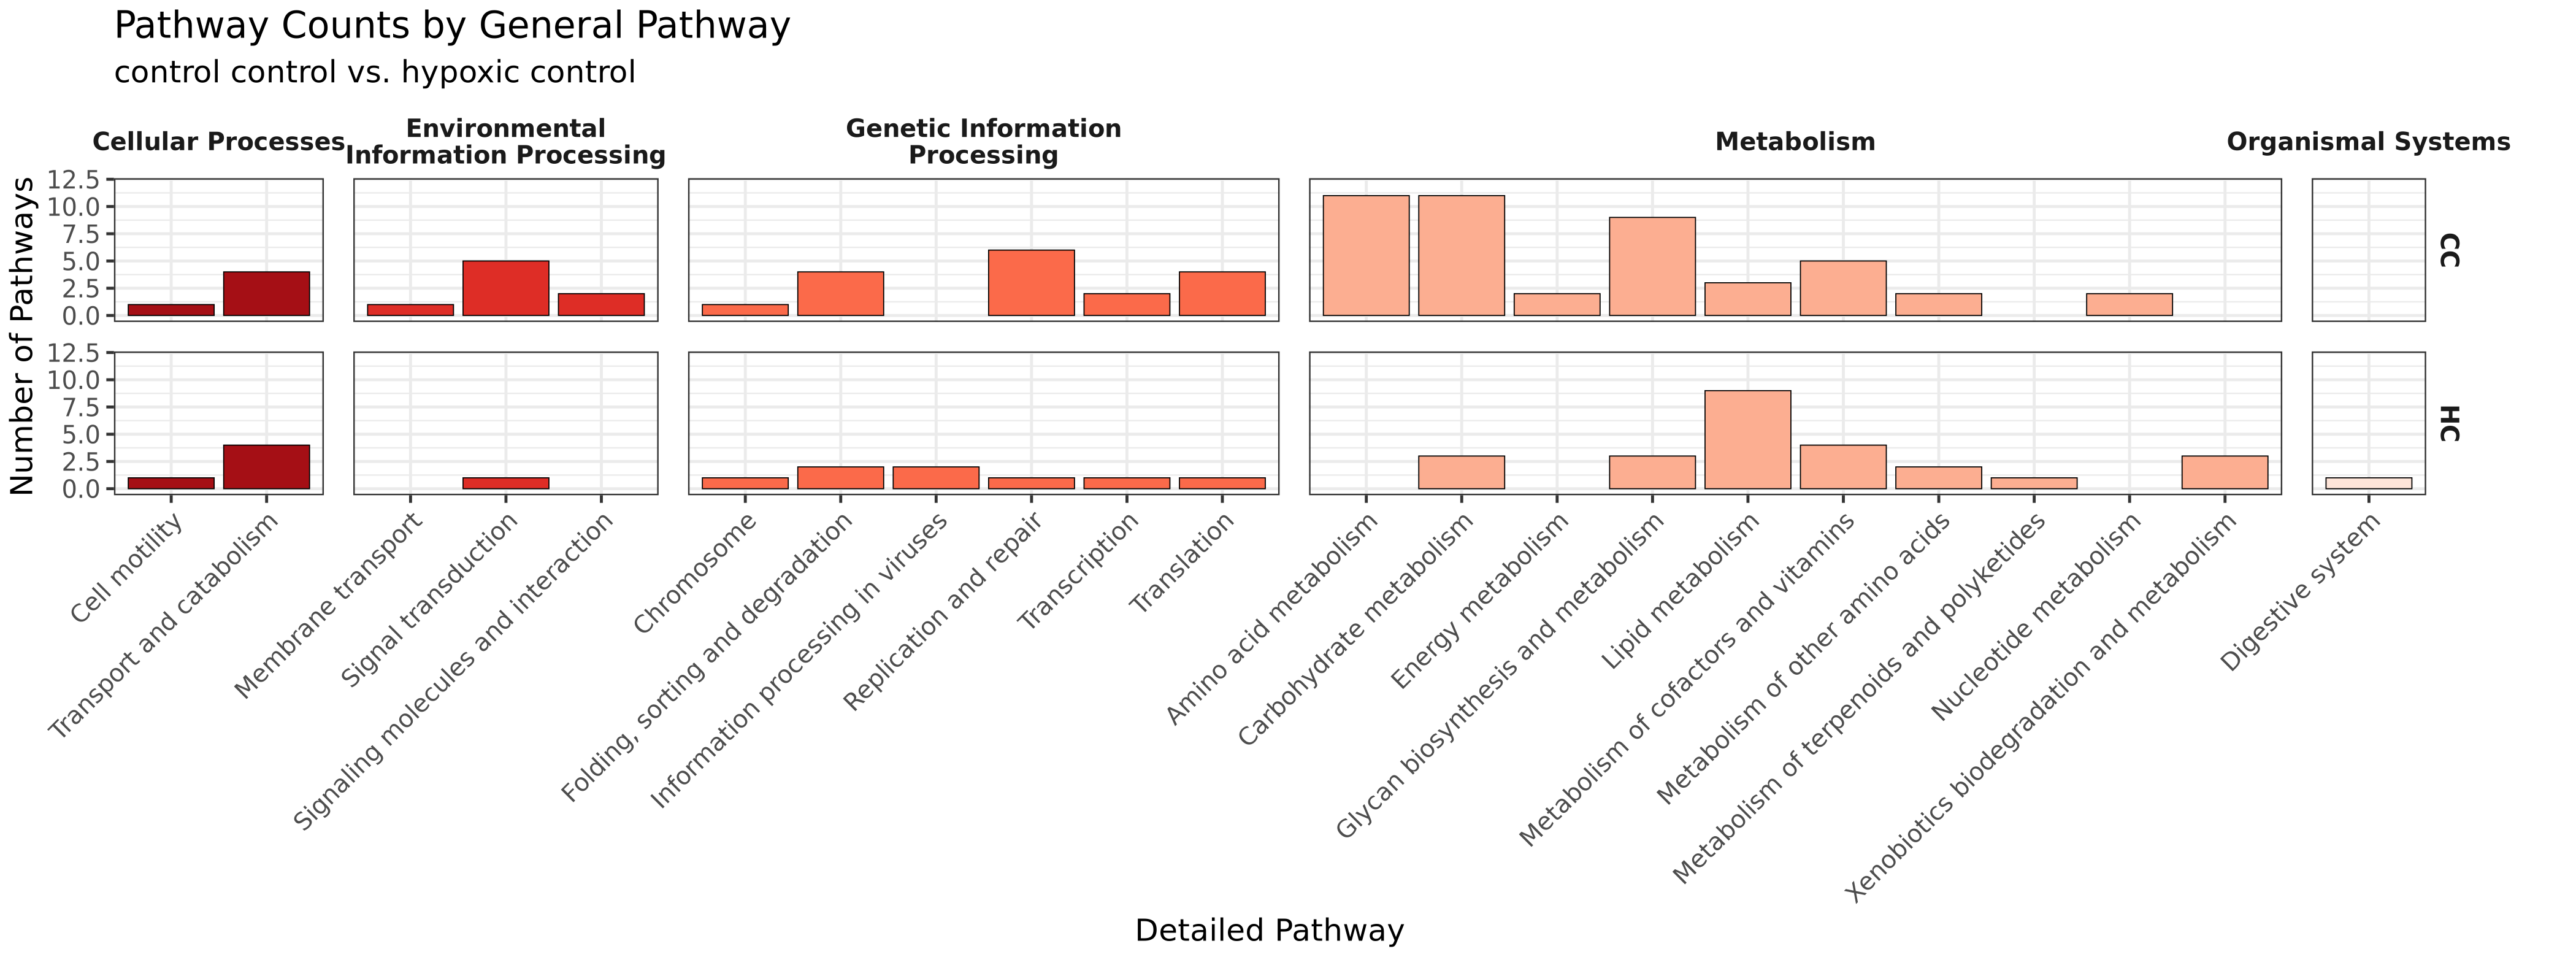

In [74]:
options(repr.plot.width=35, repr.plot.height=13)

ggplot(data= CC_df, aes(x = DetailedPathway, 
                        fill = GeneralPathway, 
                        col = 'black')) +
geom_bar(show.legend=FALSE) +
theme_bw(base_size=30) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', 
           space = 'free', 
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_color_manual(values = c('black','black','black','black','black')) +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
     strip.clip = "off", # allows grid labels to have overlap
      strip.text = element_text(face = 'bold'), 
      panel.spacing = unit(2, "lines"), # adds space between panels
      plot.margin = margin(10,100,10,10), # adds space around plot (top, right, bottom, left)
     #strip.text.x = element_text(size=25),
     strip.background = element_rect(fill = "transparent", # removes background from grid labels
                                     color = NA )) + # removes grid border
scale_fill_brewer(palette = 'Reds', direction = -1) +
ylim(0,12) +
labs(x = "Detailed Pathway", 
       y = "Number of Pathways", 
       title = "Pathway Counts by General Pathway",
       subtitle = "control control vs. hypoxic control",
      fill = "General Pathway")

**what are the top 10 most significantly enriched pathways?**

I'm choosing to look at this by pulling out the pathways with the top 10 lowest adjust p-values (but maybe this would be better to do with p-value, q-value, or enrichmentScore?)

,X,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway,direction
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.7847989,0.07074233,Metabolism,Lipid metabolism,HC
2,cvn00310,cvn00310,Lysine degradation,-0.5216369,0.66371146,Metabolism,Amino acid metabolism,CC
3,cvn00591,cvn00591,Linoleic acid metabolism,0.6158160,0.66371146,Metabolism,Lipid metabolism,HC
4,cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5444173,0.66371146,Metabolism,Lipid metabolism,HC
5,cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,-0.4211890,0.66371146,Genetic Information Processing,Translation,CC
6,cvn04068,cvn04068,FoxO signaling pathway,-0.4086433,0.66371146,Environmental Information Processing,Signal transduction,CC
7,cvn04146,cvn04146,Peroxisome,0.3366598,0.66371146,Cellular Processes,Transport and catabolism,HC
8,cvn00270,cvn00270,Cysteine and methionine metabolism,-0.4343565,0.70819698,Metabolism,Amino acid metabolism,CC
9,cvn00500,cvn00500,Starch and sucrose metabolism,-0.5121460,0.70819698,Metabolism,Carbohydrate metabolism,CC


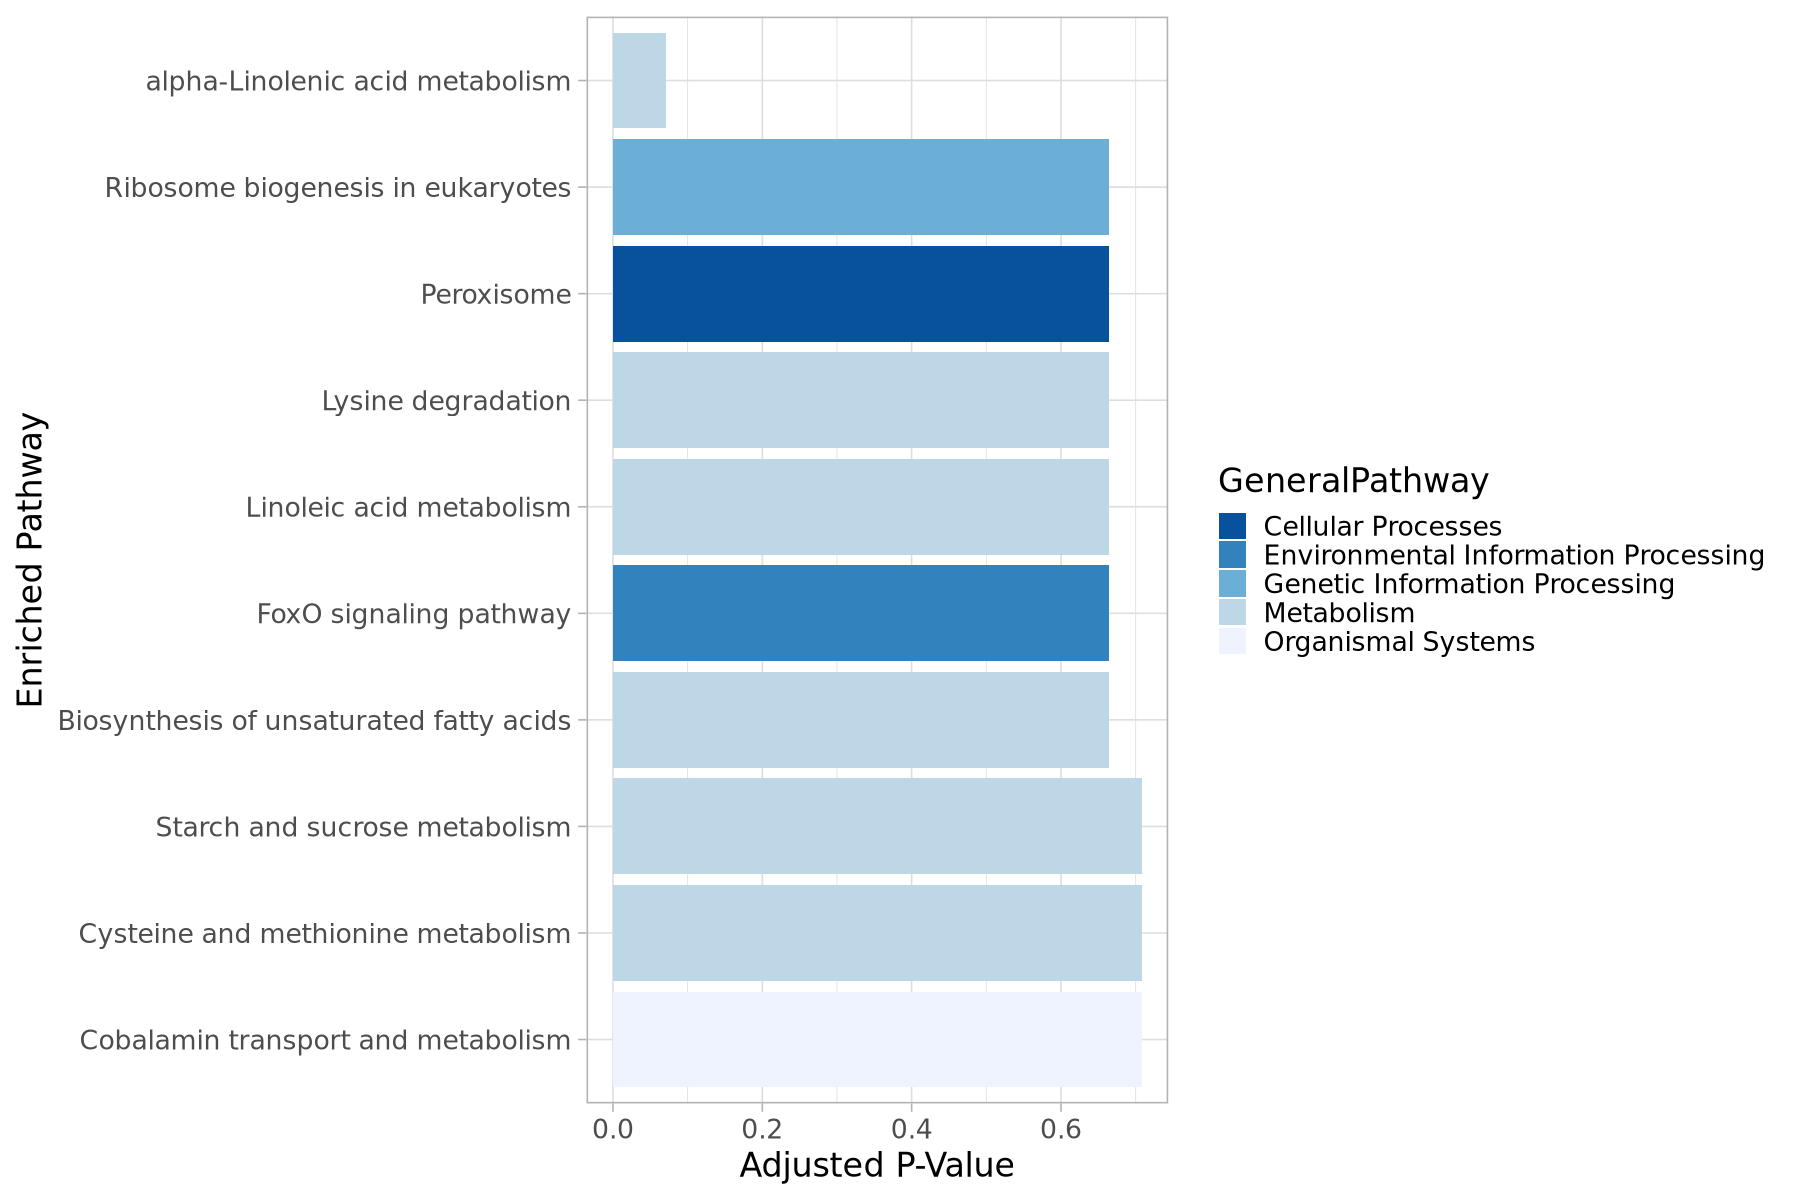

In [80]:
options(repr.plot.width=15, repr.plot.height=10)

CC_top10 <- head(CC_df[order(CC_df$p.adjust), ], 10)
CC_top10

ggplot(CC_top10, aes(x = reorder(Description, -p.adjust), y = p.adjust, fill = GeneralPathway)) +
  geom_bar(stat = "identity") +
  coord_flip() +
geom_vline(xintercept = 0.05,
           col = "gray",
           linetype = 'dashed', 
          linewidth = 10) + # significance threshold line
scale_fill_brewer(palette = 'Blues', direction=-1) +
  labs(y = "Adjusted P-Value",
       x = "Enriched Pathway") +
  theme_light(base_size=20)

In [81]:
CC_top10$Description

[1] "alpha-Linolenic acid metabolism"        
 [2] "Lysine degradation"                     
 [3] "Linoleic acid metabolism"               
 [4] "Biosynthesis of unsaturated fatty acids"
 [5] "Ribosome biogenesis in eukaryotes"      
 [6] "FoxO signaling pathway"                 
 [7] "Peroxisome"                             
 [8] "Cysteine and methionine metabolism"     
 [9] "Starch and sucrose metabolism"          
[10] "Cobalamin transport and metabolism"

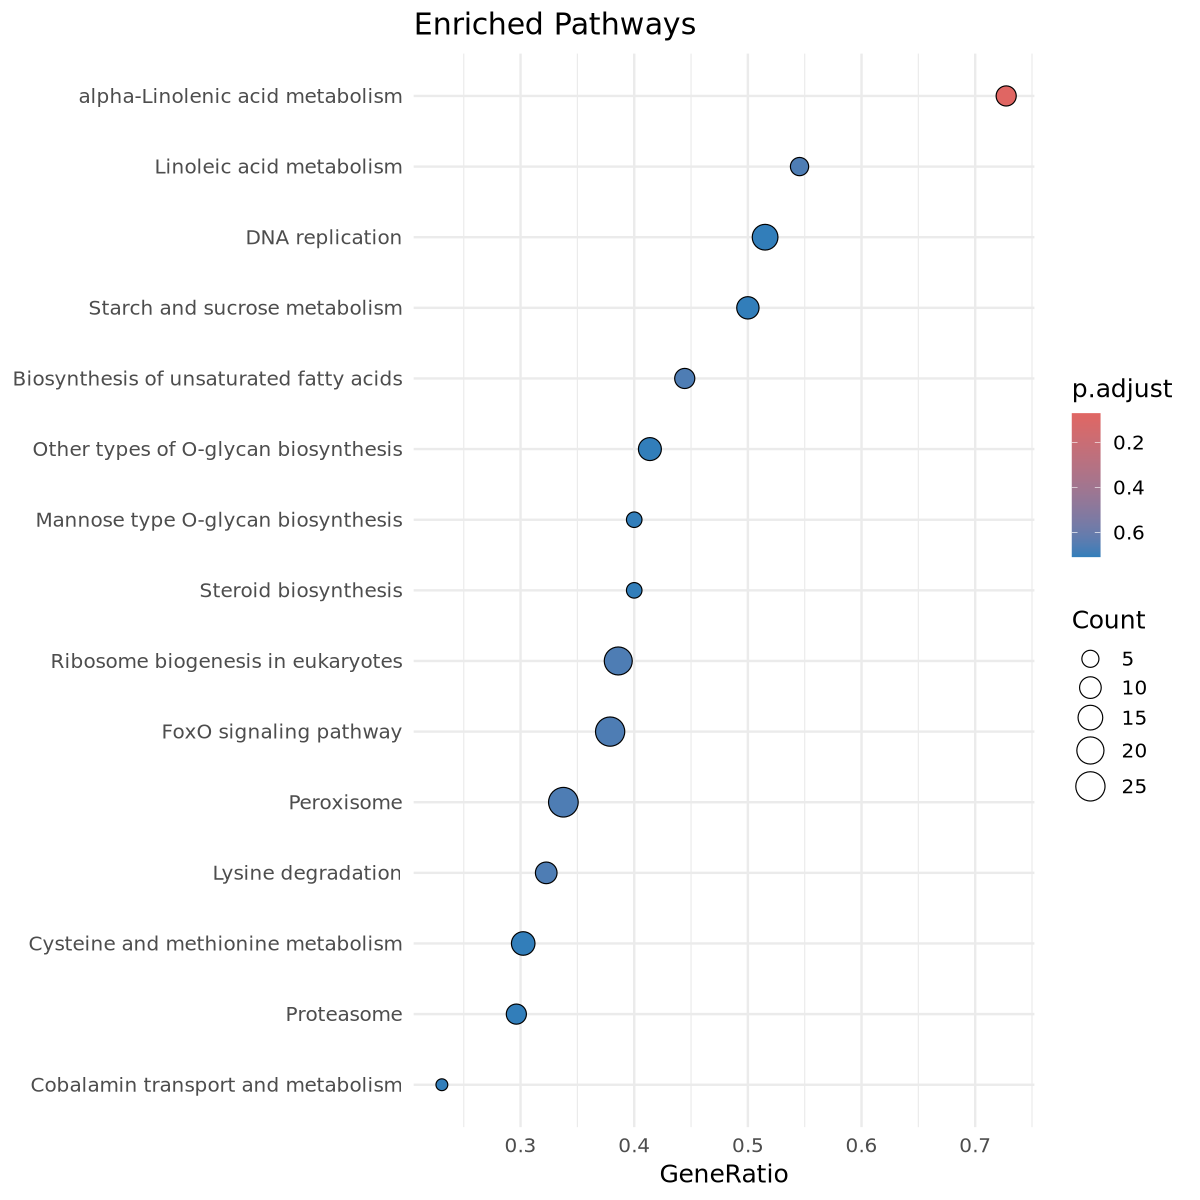

In [138]:
options(repr.plot.width=10, repr.plot.height=10)

CC_kk2@result$Description <- gsub(CC_kk2@result$Description, pattern="\\s-\\sCra.+$", replacement="")

# Create the dot plot
dotplot(CC_kk2, 
        showCategory = 15,  # Number of categories to show
        font.size = 9,      # Font size for labels
        label_format = 100,  # Format for labels (length limit)
        title = "Enriched Pathways") +
  theme_minimal(base_size = 15)  # Optional: change theme for better appearance


## control hypoxic vs. hypoxic control
CH vs. HC

In [24]:
head(CH_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111120752,0.3456118,0.01574870,0.2293653,0,1,NA
2,LOC111109452,1.5973302,-0.02110917,0.2543295,0,1,NA
3,LOC111124802,213.0013054,0.02990042,0.1181432,0,1,1
4,LOC111101273,76.7130208,0.04883435,0.1588545,0,1,1
5,LOC111101250,123.4748149,-0.21553529,0.1788606,0,1,1
6,LOC111101262,269.4443993,-0.02049799,0.1220125,0,1,1


formatting the df as needed to run KEGG

In [25]:
# selecting columns I need
ch_hc <- select(CH_HC, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
ch_hc$X <- substr(ch_hc$X, start = 4, stop = nchar(ch_hc$X))

# renaming columns
colnames(ch_hc) <- c('gene', 'lfc', 'padj')

head(ch_hc)

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
1,111120752,0.01574870,NA
2,111109452,-0.02110917,NA
3,111124802,0.02990042,1
4,111101273,0.04883435,1
5,111101250,-0.21553529,1
6,111101262,-0.02049799,1


In [7]:
# creating numeric vector for kegg object
CH_kegg_gene_list <- ch_hc$lfc
names(CH_kegg_gene_list) <- ch_hc$gene

# omitting anything with NA in a cell
CH_kegg_gene_list <- na.omit(CH_kegg_gene_list)

# sort list in descending order
CH_kegg_gene_list = sort(CH_kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(CH_kegg_gene_list)
class(CH_kegg_gene_list)

111131170 111128942 111121672 111115224 111133384 111135891 
 2.032191  1.815364  1.783811  1.768623  1.726581  1.723637

[1] "numeric"

now that my gene list looks okay - running KEGG

In [8]:
kegg_organism = 'cvn'
CH_kk2 <- gseKEGG(geneList = CH_kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

Reading KEGG annotation online: "https://rest.kegg.jp/link/cvn/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/cvn"...

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.2% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [12]:
CH_kk2_df <- as.data.frame(CH_kk2)
CH_kk2_df$Description <- sub(" -.*", "", CH_kk2_df$Description)
head(CH_kk2_df)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,18,0.5930271,1.630181,0.02035597,0.6780874,0.6780874,1946,"tags=33%, list=14%, signal=29%",111129730/111136438/111136066/111119293/111131209/111107112
cvn00592,cvn00592,alpha-Linolenic acid metabolism,11,0.6580772,1.581898,0.02881907,0.6780874,0.6780874,2321,"tags=45%, list=17%, signal=38%",111136438/111136066/111123661/111107112/111127642
cvn00450,cvn00450,Selenocompound metabolism,13,-0.6570291,-1.581333,0.02380757,0.6780874,0.6780874,727,"tags=31%, list=5%, signal=29%",111130865/111119950/111122141/111099623
cvn00980,cvn00980,Metabolism of xenobiotics by cytochrome P450,16,0.5629852,1.491490,0.05816555,0.6780874,0.6780874,750,"tags=25%, list=6%, signal=24%",111121161/111134996/111110471/111134997
cvn00270,cvn00270,Cysteine and methionine metabolism,43,-0.4700245,-1.483510,0.03429863,0.6780874,0.6780874,1286,"tags=28%, list=10%, signal=25%",111106176/111123773/111100699/111133693/111130865/111135192/111110831/111136621/111122141/111122163/111137596/111129934
cvn00670,cvn00670,One carbon pool by folate,19,-0.5313855,-1.416270,0.07678571,0.6780874,0.6780874,1406,"tags=42%, list=10%, signal=38%",111104244/111106392/111109454/111128337/111130865/111099502/111115204/111100544


the code below takes a long time to run - should only be run once, then have the resulting df saved into a csv to just call back for analysis afterwords

generated with help of ChatGPT
Function to get pathway names
```get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```
generated with help of ChatGPT
```
gseKEGG_df <- select(CH_kk2_df, ID, Description, enrichmentScore, p.adj)
```
Function to apply to each KEGG ID in the dataframe
```
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)
```
Combine pathway info into a dataframe
```
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')
```
Combine pathway info with original dataframe
```
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)
```
Print the dataframe
```
head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)
```
cleaning up GeneralPathway column to only include the pathway name and not CLASS
```
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column
```
also changing DetailedPathway into character instead of list to be able to write csv
```
df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)
```

In [ ]:
CH_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_CH_HC.csv')

In [61]:
# making sure R see enrichment score as a number
CH_df$enrichmentScore <- as.numeric(CH_df$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
CH_df$direction <- ifelse(CH_df$enrichmentScore<0, "CH", #neg ES = pathway for control
                              ifelse(CH_df$enrichmentScore>0, "HC", # pos ES = pathway for warm
                                     "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(CH_df)

,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway,direction
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5930271,0.6780874,Metabolism,Lipid metabolism,HC
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.6580772,0.6780874,Metabolism,Lipid metabolism,HC
cvn00450,cvn00450,Selenocompound metabolism,-0.6570291,0.6780874,Metabolism,Metabolism of other amino acids,CH
cvn00980,cvn00980,Metabolism of xenobiotics by cytochrome P450,0.5629852,0.6780874,Metabolism,Xenobiotics biodegradation and metabolism,HC
cvn00270,cvn00270,Cysteine and methionine metabolism,-0.4700245,0.6780874,Metabolism,Amino acid metabolism,CH
cvn00670,cvn00670,One carbon pool by folate,-0.5313855,0.6780874,Metabolism,Metabolism of cofactors and vitamins,CH


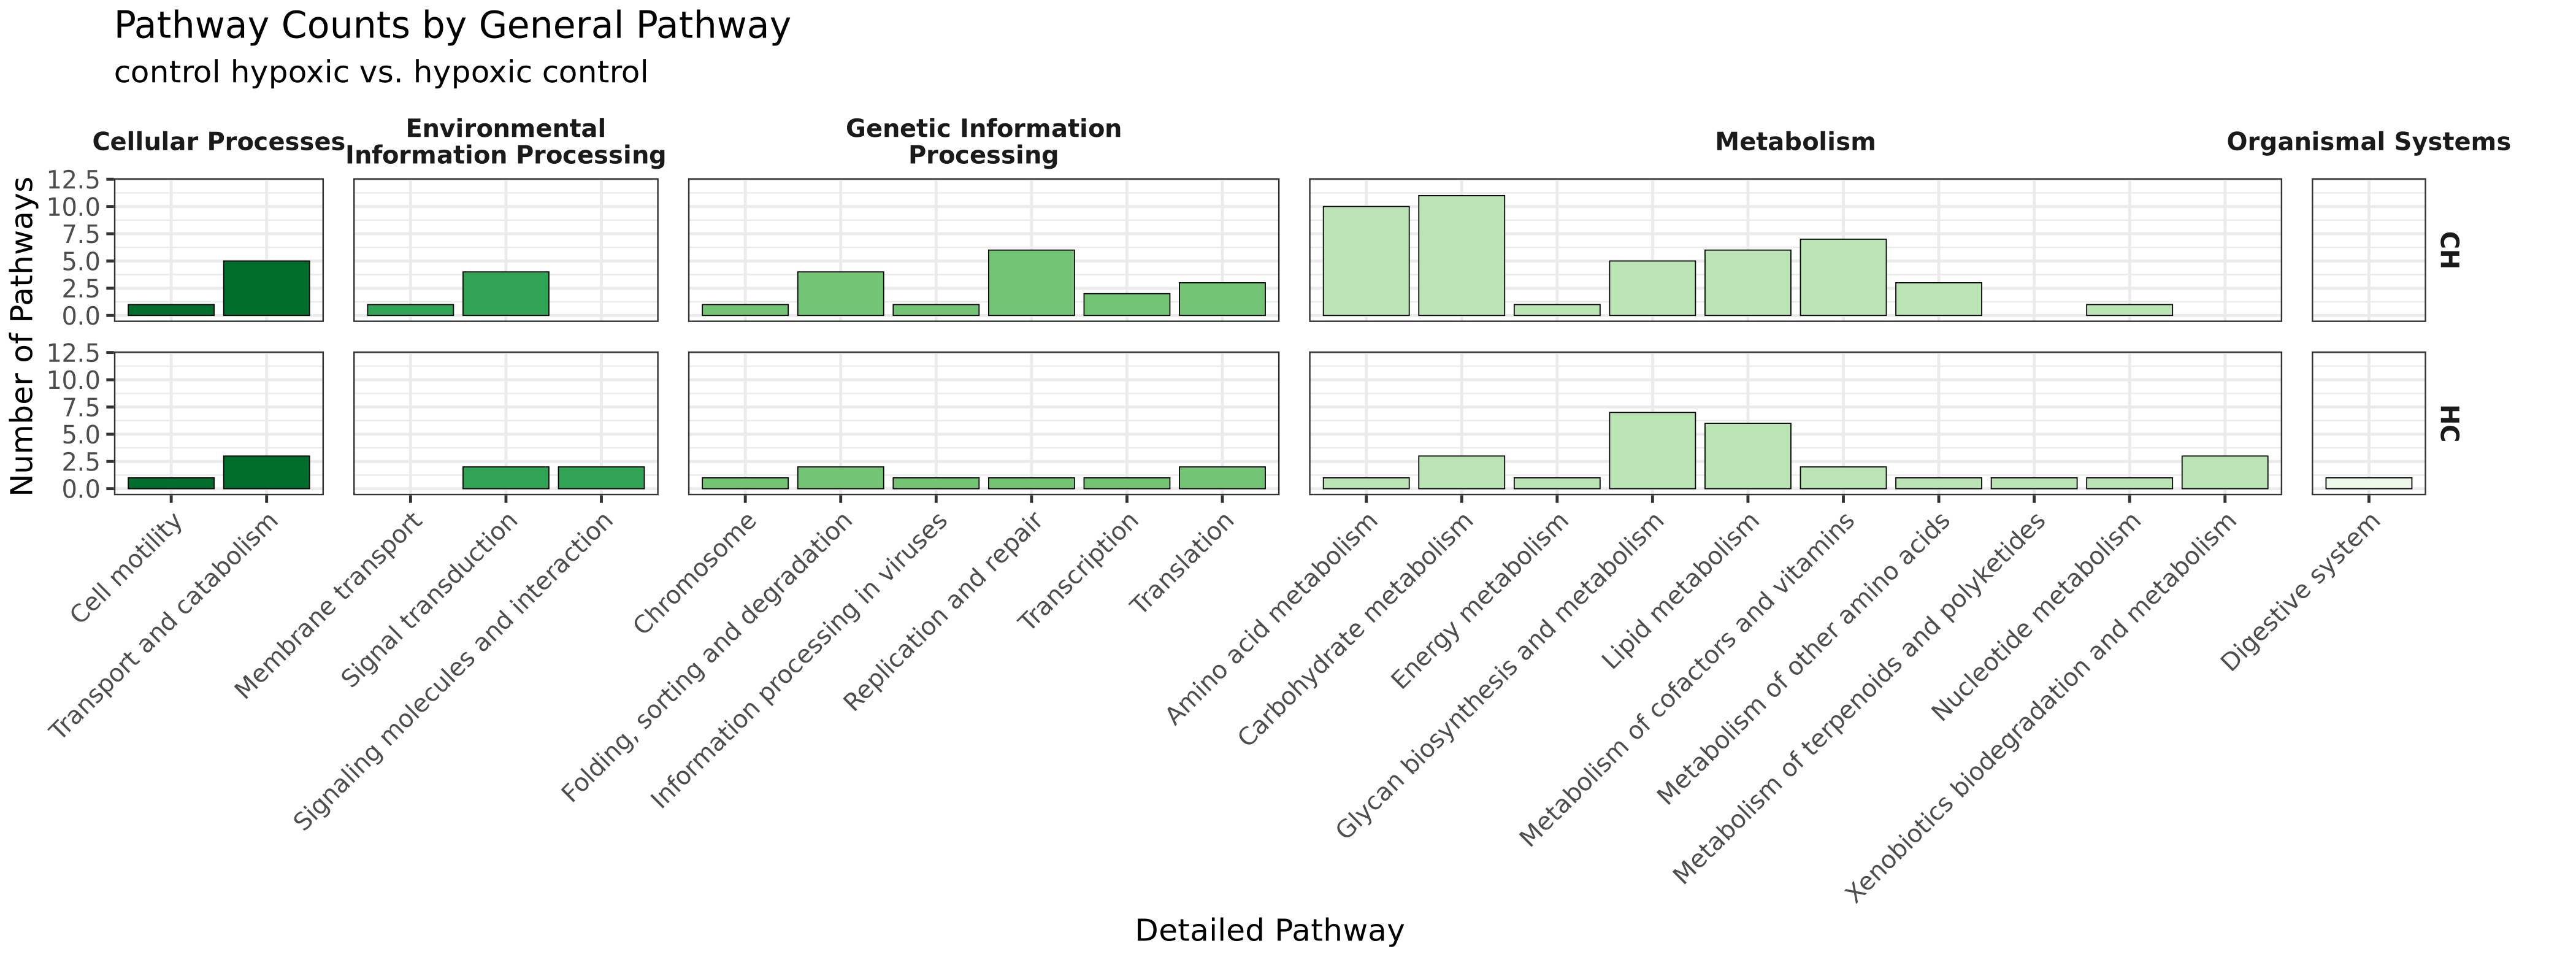

In [75]:
options(repr.plot.width=35, repr.plot.height=13)

ggplot(data= CH_df, aes(x = DetailedPathway, 
                        fill = GeneralPathway, 
                        col = 'black')) +
geom_bar(show.legend=FALSE) +
theme_bw(base_size=30) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', 
           space = 'free', 
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_color_manual(values = c('black','black','black','black','black')) +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
     strip.clip = "off", # allows grid labels to have overlap
      strip.text = element_text(face = 'bold'), 
      panel.spacing = unit(2, "lines"), # adds space between panels
      plot.margin = margin(10,100,10,10), # adds space around plot (top, right, bottom, left)
     #strip.text.x = element_text(size=25),
     strip.background = element_rect(fill = "transparent", # removes background from grid labels
                                     color = NA )) + # removes grid border
scale_fill_brewer(palette = 'Greens', direction = -1) +
ylim(0,12) +
labs(x = "Detailed Pathway", 
       y = "Number of Pathways", 
       title = "Pathway Counts by General Pathway",
       subtitle = "control hypoxic vs. hypoxic control",
      fill = "General Pathway")

In [78]:
CH_top10$Description

[1] "Biosynthesis of unsaturated fatty acids"     
 [2] "alpha-Linolenic acid metabolism"             
 [3] "Selenocompound metabolism"                   
 [4] "Metabolism of xenobiotics by cytochrome P450"
 [5] "Cysteine and methionine metabolism"          
 [6] "One carbon pool by folate"                   
 [7] "Linoleic acid metabolism"                    
 [8] "Pentose and glucuronate interconversions"    
 [9] "Glyoxylate and dicarboxylate metabolism"     
[10] "Ubiquitin mediated proteolysis"

**what are the top 10 most significantly enriched pathways?**

I'm choosing to look at this by pulling out the pathways with the top 10 lowest adjust p-values (but maybe this would be better to do with p-value, q-value, or enrichmentScore?)

,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,0.5930271,0.6780874,Metabolism,Lipid metabolism
cvn00592,cvn00592,alpha-Linolenic acid metabolism,0.6580772,0.6780874,Metabolism,Lipid metabolism
cvn00450,cvn00450,Selenocompound metabolism,-0.6570291,0.6780874,Metabolism,Metabolism of other amino acids
cvn00980,cvn00980,Metabolism of xenobiotics by cytochrome P450,0.5629852,0.6780874,Metabolism,Xenobiotics biodegradation and metabolism
cvn00270,cvn00270,Cysteine and methionine metabolism,-0.4700245,0.6780874,Metabolism,Amino acid metabolism
cvn00670,cvn00670,One carbon pool by folate,-0.5313855,0.6780874,Metabolism,Metabolism of cofactors and vitamins
cvn00591,cvn00591,Linoleic acid metabolism,0.5816608,0.6780874,Metabolism,Lipid metabolism
cvn00040,cvn00040,Pentose and glucuronate interconversions,-0.5880763,0.6780874,Metabolism,Carbohydrate metabolism
cvn00630,cvn00630,Glyoxylate and dicarboxylate metabolism,-0.4497011,0.6780874,Metabolism,Carbohydrate metabolism


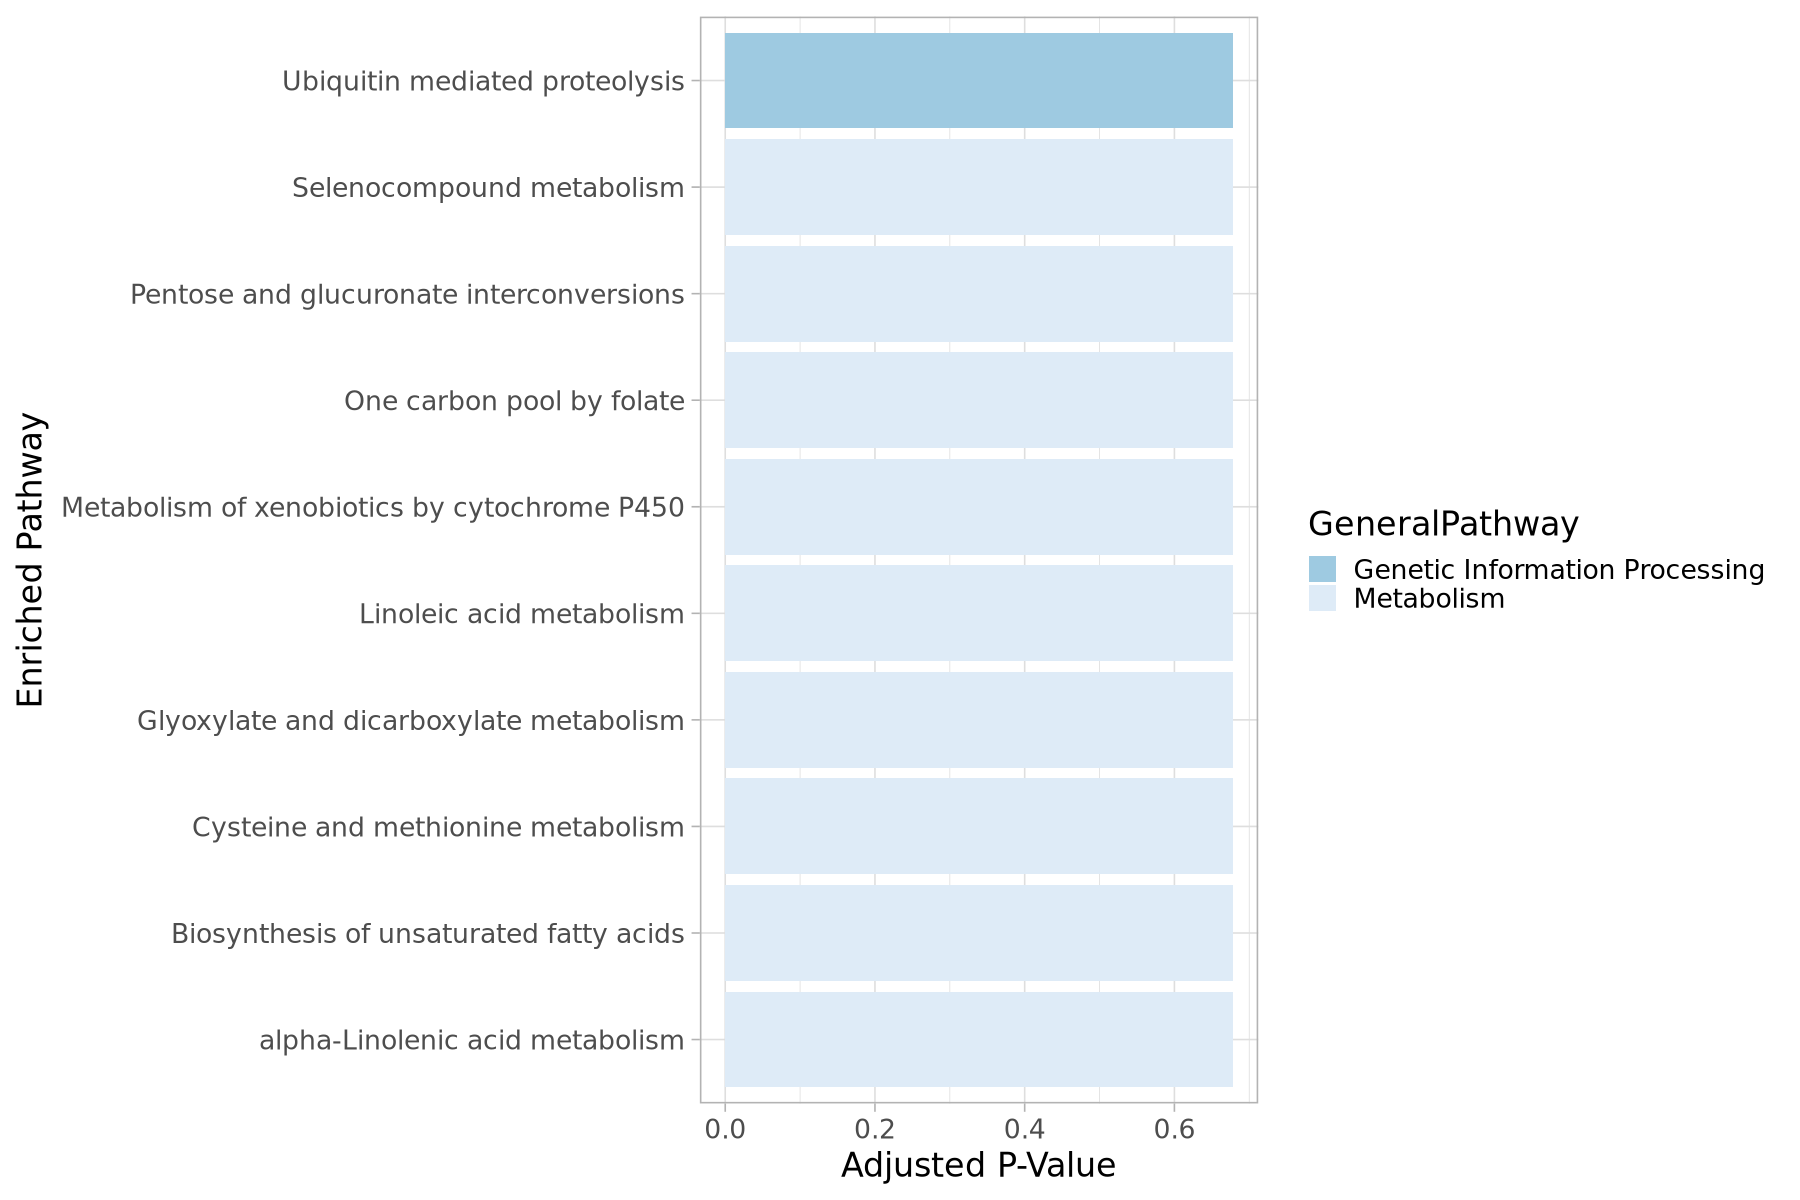

In [26]:
options(repr.plot.width=15, repr.plot.height=10)

CH_top10 <- head(CH_df[order(CH_df$p.adjust), ], 10)
CH_top10

ggplot(CH_top10, aes(x = reorder(Description, -p.adjust), y = p.adjust, fill = GeneralPathway)) +
  geom_bar(stat = "identity") +
  coord_flip() +
geom_vline(xintercept = 0.05,
           col = "gray",
           linetype = 'dashed', 
          linewidth = 10) + # significance threshold line
scale_fill_brewer(palette = 'Blues', direction=-1) +
  labs(y = "Adjusted P-Value",
       x = "Enriched Pathway") +
  theme_light(base_size=20)

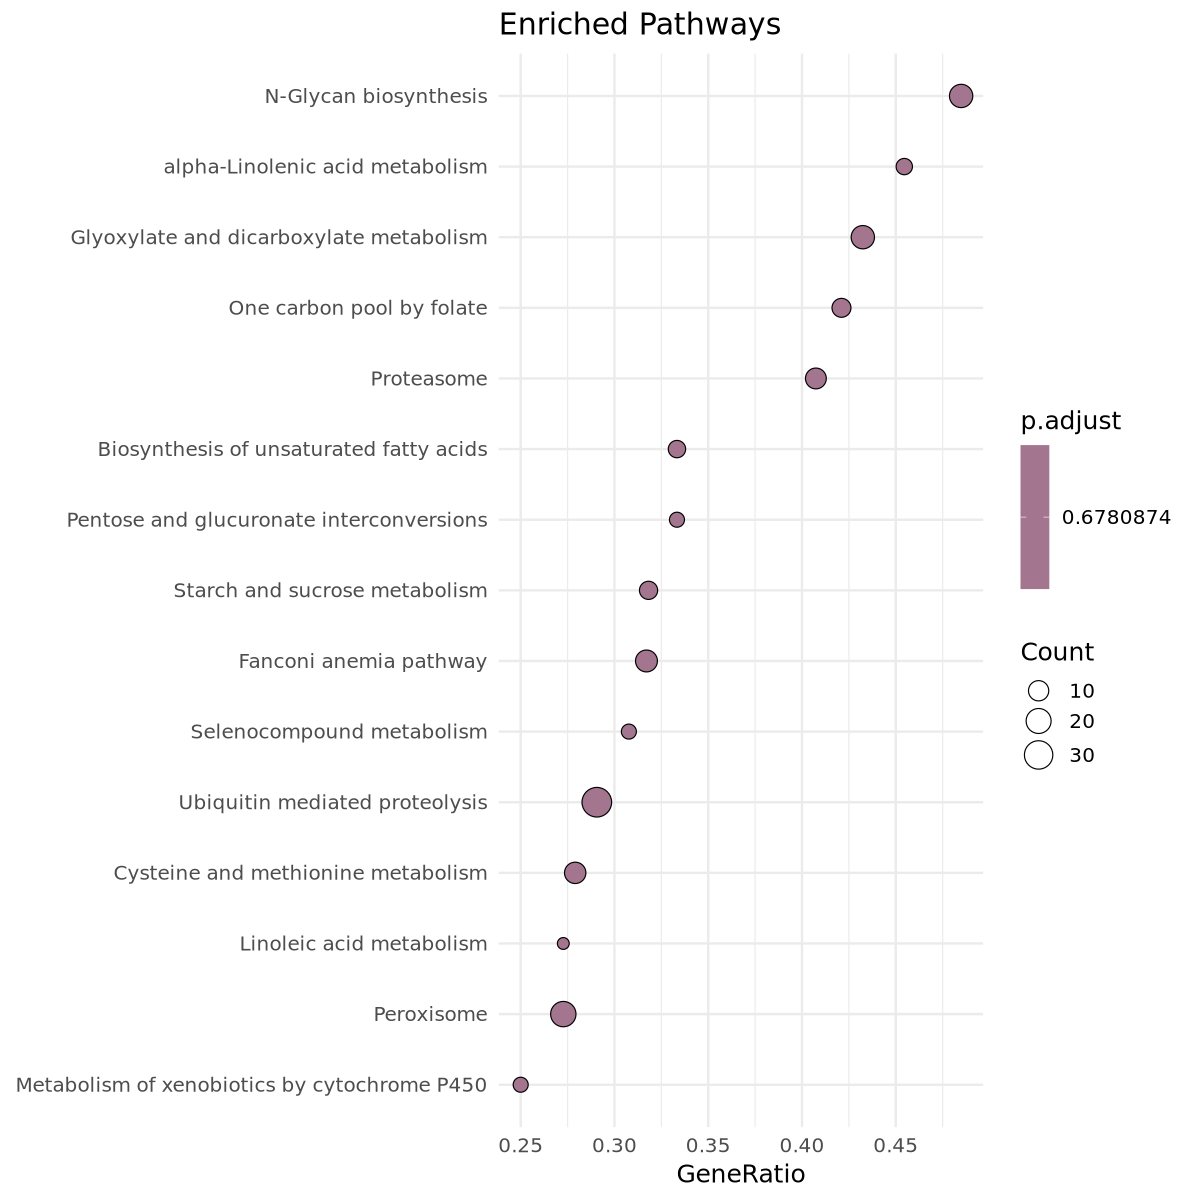

In [29]:
options(repr.plot.width=10, repr.plot.height=10)

CH_kk2@result$Description <- gsub(CH_kk2@result$Description, pattern="\\s-\\sCra.+$", replacement="")

# Create the dot plot
dotplot(CH_kk2, 
        showCategory = 15,  # Number of categories to show
        font.size = 9,      # Font size for labels
        label_format = 100,  # Format for labels (length limit)
        title = "Enriched Pathways") +
  theme_minimal(base_size = 15)  # Optional: change theme for better appearance


## hypoxic hypoxic vs. hypoxic control
HH vs. HC

In [31]:
head(HH_HC)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LOC111120752,0.3456118,-0.15734693,0.2305386,0.0000000,1.000000,NA
2,LOC111109452,1.5973302,0.33129064,0.2600342,0.3126152,0.754573,NA
3,LOC111124802,213.0013054,-0.07669030,0.1125398,0.0000000,1.000000,1
4,LOC111101273,76.7130208,-0.06379838,0.1495362,0.0000000,1.000000,1
5,LOC111101250,123.4748149,-0.04446060,0.1737339,0.0000000,1.000000,1
6,LOC111101262,269.4443993,-0.07196657,0.1174022,0.0000000,1.000000,1


formatting the df as needed to run KEGG

In [32]:
# selecting columns I need
hh_hc <- select(HH_HC, X, log2FoldChange, padj)

# KEGG uses entrez IDs, which are my ensembl IDs without the 'LOC' in front of them, so need to convert those
hh_hc$X <- substr(hh_hc$X, start = 4, stop = nchar(hh_hc$X))

# renaming columns
colnames(hh_hc) <- c('gene', 'lfc', 'padj')

head(hh_hc)

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
1,111120752,-0.15734693,NA
2,111109452,0.33129064,NA
3,111124802,-0.07669030,1
4,111101273,-0.06379838,1
5,111101250,-0.04446060,1
6,111101262,-0.07196657,1


In [34]:
# creating numeric vector for kegg object
HH_kegg_gene_list <- hh_hc$lfc
names(HH_kegg_gene_list) <- hh_hc$gene

# omitting anything with NA in a cell
HH_kegg_gene_list <- na.omit(HH_kegg_gene_list)

# sort list in descending order
HH_kegg_gene_list = sort(HH_kegg_gene_list, decreasing = TRUE)

# checking that things look okay
head(HH_kegg_gene_list)
class(HH_kegg_gene_list)

111108235 111119327 111103340 111119407 111109525 111112560 
 2.370191  2.139134  2.109819  2.048889  2.012169  1.980238

[1] "numeric"

now that my gene list looks okay - running KEGG

In [35]:
kegg_organism = 'cvn'
HH_kk2 <- gseKEGG(geneList = HH_kegg_gene_list,
               organism = kegg_organism,
               #minGSSize = 1,
               #maxGSSize = 800,
               pvalueCutoff = 1,
               pAdjustMethod = 'BH', #Benjamini-Hockberg FDR
               scoreType = 'std', # standard - only change for one-tailed tests
               keyType = 'kegg')

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [36]:
HH_kk2_df <- as.data.frame(HH_kk2)
HH_kk2_df$Description <- sub(" -.*", "", HH_kk2_df$Description)
head(HH_kk2_df)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
cvn00270,cvn00270,Cysteine and methionine metabolism,43,0.5558442,1.804061,0.001732296,0.2113401,0.2060520,1290,"tags=30%, list=10%, signal=27%",111137596/111135192/111122141/111129934/111136621/111122163/111110831/111130865/111133693/111100699/111106176/111111318/111116065
cvn00592,cvn00592,alpha-Linolenic acid metabolism,11,-0.7041848,-1.705983,0.009035189,0.3964536,0.3865337,1928,"tags=73%, list=14%, signal=62%",111123661/111124908/111136438/111136066/111107112/111115744/111113990/111127642
cvn04120,cvn04120,Ubiquitin mediated proteolysis,117,0.3889277,1.489363,0.009748858,0.3964536,0.3865337,2757,"tags=34%, list=20%, signal=27%",111121155/111100396/111104196/111120860/111137343/111099688/111138340/111135325/111119134/111131129/111104637/111129295/111124955/111130310/111105462/111114538/111110185/111120632/111103787/111102530/111105597/111130966/111103790/111123155/111120128/111103271/111121135/111120086/111128926/111129467/111132898/111104077/111133998/111121443/111100417/111128564/111103982/111136470/111129365/111126002
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,18,-0.5944713,-1.642734,0.014972770,0.4566695,0.4452429,1920,"tags=50%, list=14%, signal=43%",111124908/111136438/111136066/111131209/111107112/111115744/111119293/111113990/111129730
cvn00591,cvn00591,Linoleic acid metabolism,11,-0.6267923,-1.518489,0.043195388,0.4674330,0.4557370,369,"tags=36%, list=3%, signal=35%",111123661/111127589/111127642/111127588
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,57,0.4319045,1.472815,0.049226138,0.4674330,0.4557370,2179,"tags=33%, list=16%, signal=28%",111121480/111128153/111132055/111128132/111102803/111133163/111102690/111123620/111130755/111119695/111120056/111128265/111128176/111121773/111118815/111110086/111122907/111119458/111121217


the code below takes a long time to run - should only be run once, then have the resulting df saved into a csv to just call back for analysis afterwords

generated with help of ChatGPT
Function to get pathway names
```get_pathway_names <- function(kegg_id) {
  url <- paste0("http://rest.kegg.jp/get/", kegg_id)
  response <- GET(url)
  
  if (status_code(response) == 200) {
    pathway_info <- content(response, "text", encoding = "UTF-8")
    general_pathway <- NA
    detailed_pathway <- NA
    
    # Extracting general and detailed pathways from the pathway info
    lines <- strsplit(pathway_info, "\n")[[1]]
    for (line in lines) {
      if (grepl("^CLASS", line)) {
        paths <- unlist(strsplit(line, ";"))
        general_pathway <- trimws(paths[1])
        detailed_pathway <- ifelse(length(paths) > 1, trimws(paths[2]), NA)
        break
      }
    }
    
    return(list(General_Pathway = general_pathway, Detailed_Pathway = detailed_pathway))
  } else {
    cat("Failed to retrieve information for pathway:", kegg_id, "\n")
    return(NULL)
  }
}
```
generated with help of ChatGPT
```
gseKEGG_df <- select(HH_kk2_df, ID, Description, enrichmentScore, p.adj)
```
Function to apply to each KEGG ID in the dataframe
```
pathway_info <- lapply(gseKEGG_df$ID, get_pathway_names)
```
Combine pathway info into a dataframe
```
pathway_df <- do.call(rbind, pathway_info)
colnames(pathway_df) <- c('GeneralPathway', 'DetailedPathway')
```
Combine pathway info with original dataframe
```
gseKEGG_df <- cbind(gseKEGG_df, pathway_df)
```
Print the dataframe
```
head(as.data.frame(gseKEGG_df))
df <- as.data.frame(gseKEGG_df)
```
cleaning up GeneralPathway column to only include the pathway name and not CLASS
```
column <- df$GeneralPathway
column <- gsub('^CLASS\\s+', '', column)
df$GeneralPathway <- column
```
also changing DetailedPathway into character instead of list to be able to write csv
```
df$DetailedPathway <- as.character(df$DetailedPathway)
head(df)
```

In [ ]:
HH_df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/KEGG_HH_HC.csv')

okay so all of these KEGG bar plots are the exact same - since my input for all of them contain the same genes, just different LFC numbers, this makes sense - i'm not telling it to look at which pair has more enrichment of a pathway - but I'm not sure that I can correctly do that anyway, since methylation data doesn't necessarily tell us a direction - just that there are more differentially methylated geenes in a certain direction (but we don't know if that's 'good'/'bad', something becoming unmethylated is just as important as becoming more methylated) - DESeq only tells me that there were changes, not that there was for sure more methylation in one treatment (CC could become unmethylated, which would show up as more methylation for HC) ... things to think about with this analysis

In [57]:
# making sure R see enrichment score as a number
HH_df$enrichmentScore <- as.numeric(HH_df$enrichmentScore)

# assigning the enriched pathway to a phase based on the enrichment score
HH_df$direction <- ifelse(HH_df$enrichmentScore<0, "HH", #neg ES = pathway for control
                              ifelse(HH_df$enrichmentScore>0, "HC", # pos ES = pathway for warm
                                     "neutral")) # don't need this, but example online had it and I can't figure out how to do this otherwise

head(HH_df)

,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway,direction
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
cvn00270,cvn00270,Cysteine and methionine metabolism,0.5558442,0.2113401,Metabolism,Amino acid metabolism,HC
cvn00592,cvn00592,alpha-Linolenic acid metabolism,-0.7041848,0.3964536,Metabolism,Lipid metabolism,HH
cvn04120,cvn04120,Ubiquitin mediated proteolysis,0.3889277,0.3964536,Genetic Information Processing,"Folding, sorting and degradation",HC
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,-0.5944713,0.4566695,Metabolism,Lipid metabolism,HH
cvn00591,cvn00591,Linoleic acid metabolism,-0.6267923,0.4674330,Metabolism,Lipid metabolism,HH
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,0.4319045,0.4674330,Genetic Information Processing,Translation,HC


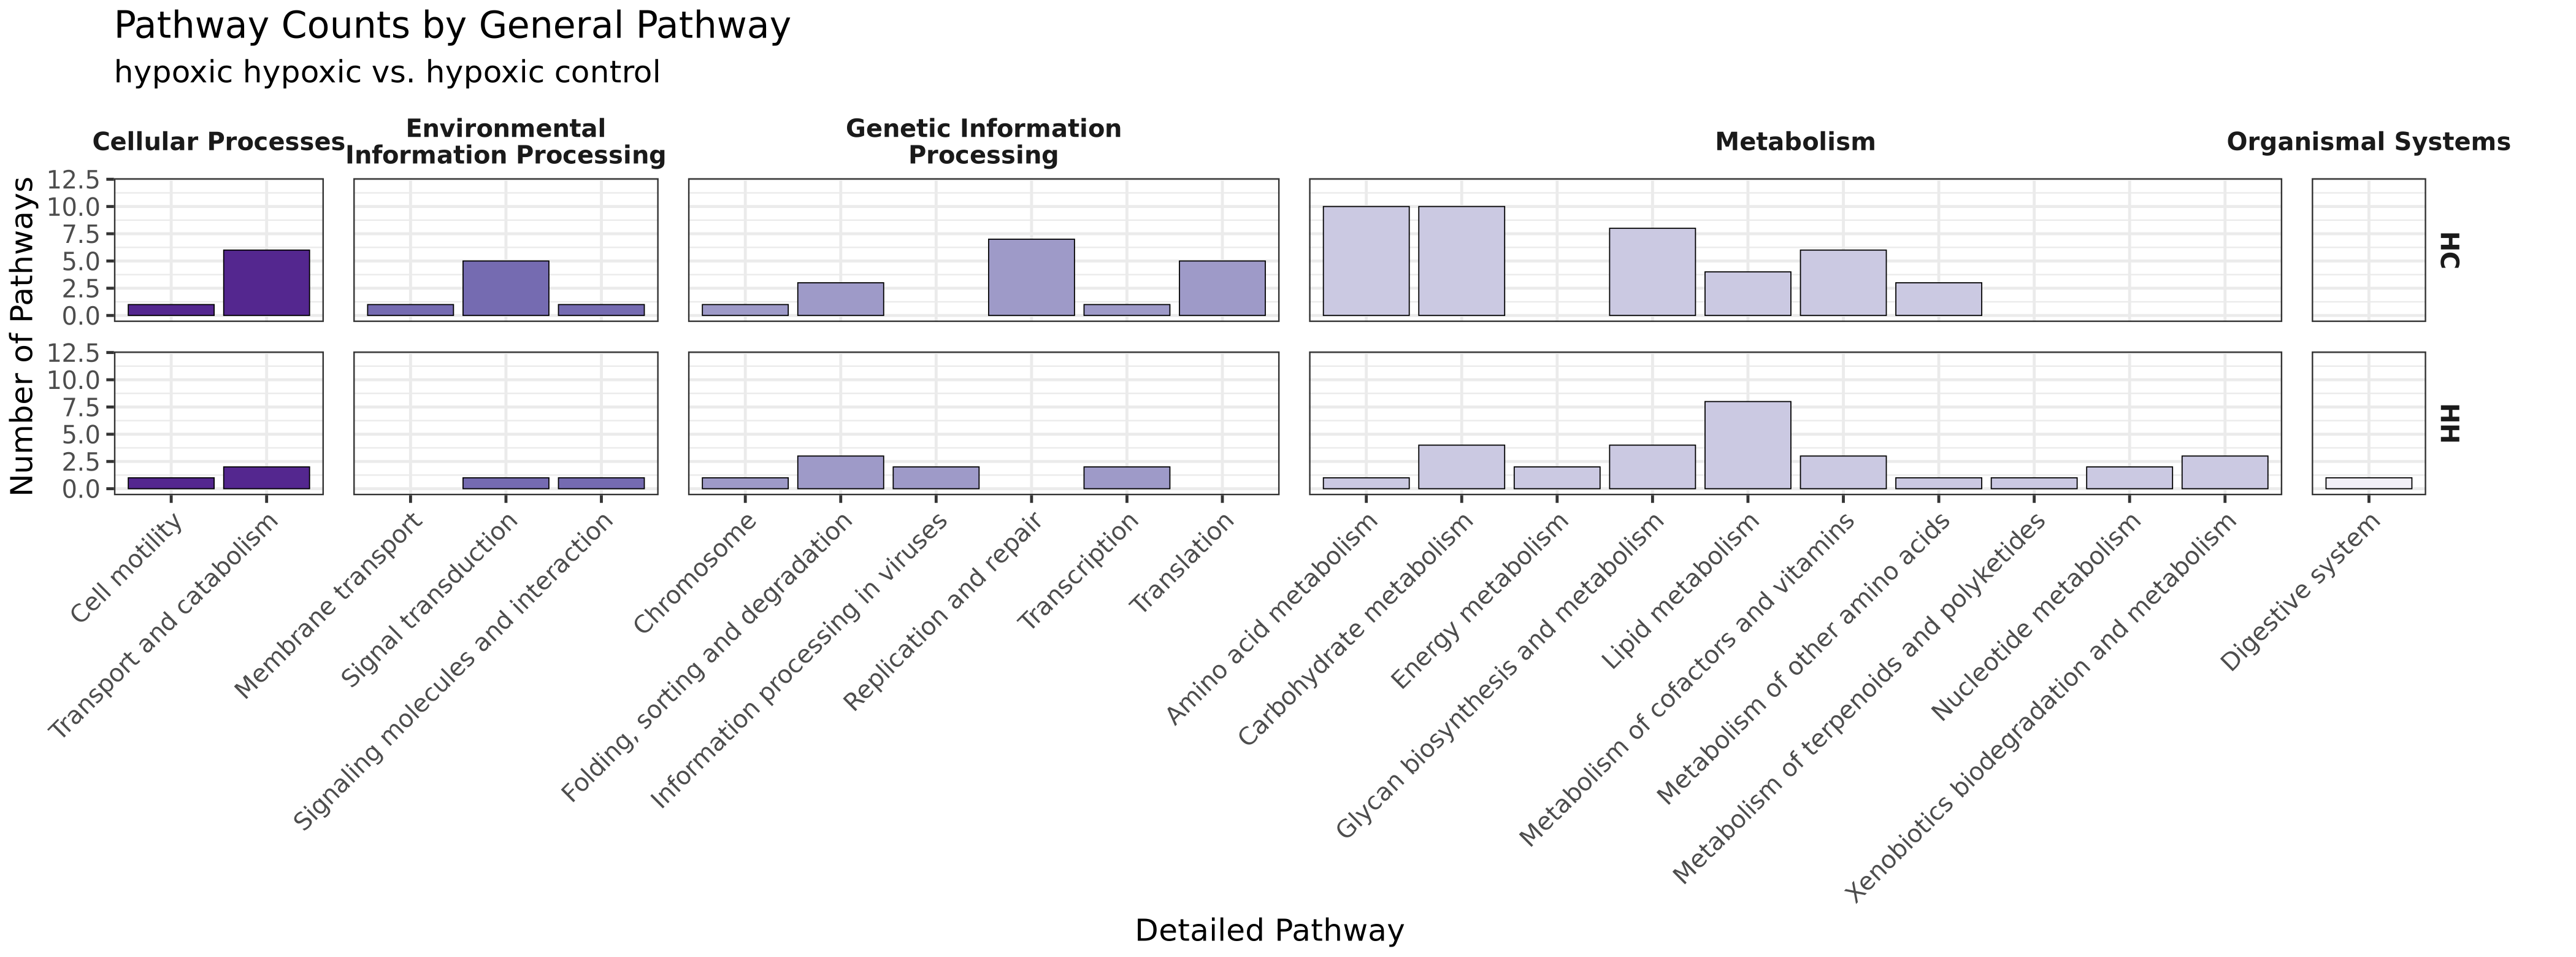

In [76]:
options(repr.plot.width=35, repr.plot.height=13)

ggplot(data= HH_df, aes(x = DetailedPathway, 
                        fill = GeneralPathway, 
                        col = 'black')) +
geom_bar(show.legend=FALSE) +
theme_bw(base_size=30) +
facet_grid(direction~GeneralPathway, 
           scales='free_x', 
           space = 'free', 
           labeller = label_wrap_gen(multi_line = TRUE)) +
scale_color_manual(values = c('black','black','black','black','black')) +
theme(axis.text.x = element_text(angle = 45, hjust = 1),
     strip.clip = "off", # allows grid labels to have overlap
      strip.text = element_text(face = 'bold'), 
      panel.spacing = unit(2, "lines"), # adds space between panels
      plot.margin = margin(10,100,10,10), # adds space around plot (top, right, bottom, left)
     #strip.text.x = element_text(size=25),
     strip.background = element_rect(fill = "transparent", # removes background from grid labels
                                     color = NA )) + # removes grid border
scale_fill_brewer(palette = 'Purples', direction = -1) +
ylim(0,12) +
labs(x = "Detailed Pathway", 
       y = "Number of Pathways", 
       title = "Pathway Counts by General Pathway",
       subtitle = "hypoxic hypoxic vs. hypoxic control",
      fill = "General Pathway")

**what are the top 10 most significantly enriched pathways?**

I'm choosing to look at this by pulling out the pathways with the top 10 lowest adjust p-values (but maybe this would be better to do with p-value, q-value, or enrichmentScore?)

,ID,Description,enrichmentScore,p.adjust,GeneralPathway,DetailedPathway
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
cvn00270,cvn00270,Cysteine and methionine metabolism,0.5558442,0.2113401,Metabolism,Amino acid metabolism
cvn00592,cvn00592,alpha-Linolenic acid metabolism,-0.7041848,0.3964536,Metabolism,Lipid metabolism
cvn04120,cvn04120,Ubiquitin mediated proteolysis,0.3889277,0.3964536,Genetic Information Processing,"Folding, sorting and degradation"
cvn01040,cvn01040,Biosynthesis of unsaturated fatty acids,-0.5944713,0.4566695,Metabolism,Lipid metabolism
cvn00591,cvn00591,Linoleic acid metabolism,-0.6267923,0.4674330,Metabolism,Lipid metabolism
cvn03008,cvn03008,Ribosome biogenesis in eukaryotes,0.4319045,0.4674330,Genetic Information Processing,Translation
cvn00260,cvn00260,"Glycine, serine and threonine metabolism",0.4743631,0.4674330,Metabolism,Amino acid metabolism
cvn03060,cvn03060,Protein export,0.5596599,0.4674330,Genetic Information Processing,"Folding, sorting and degradation"
cvn00510,cvn00510,N-Glycan biosynthesis,-0.4415968,0.4674330,Metabolism,Glycan biosynthesis and metabolism


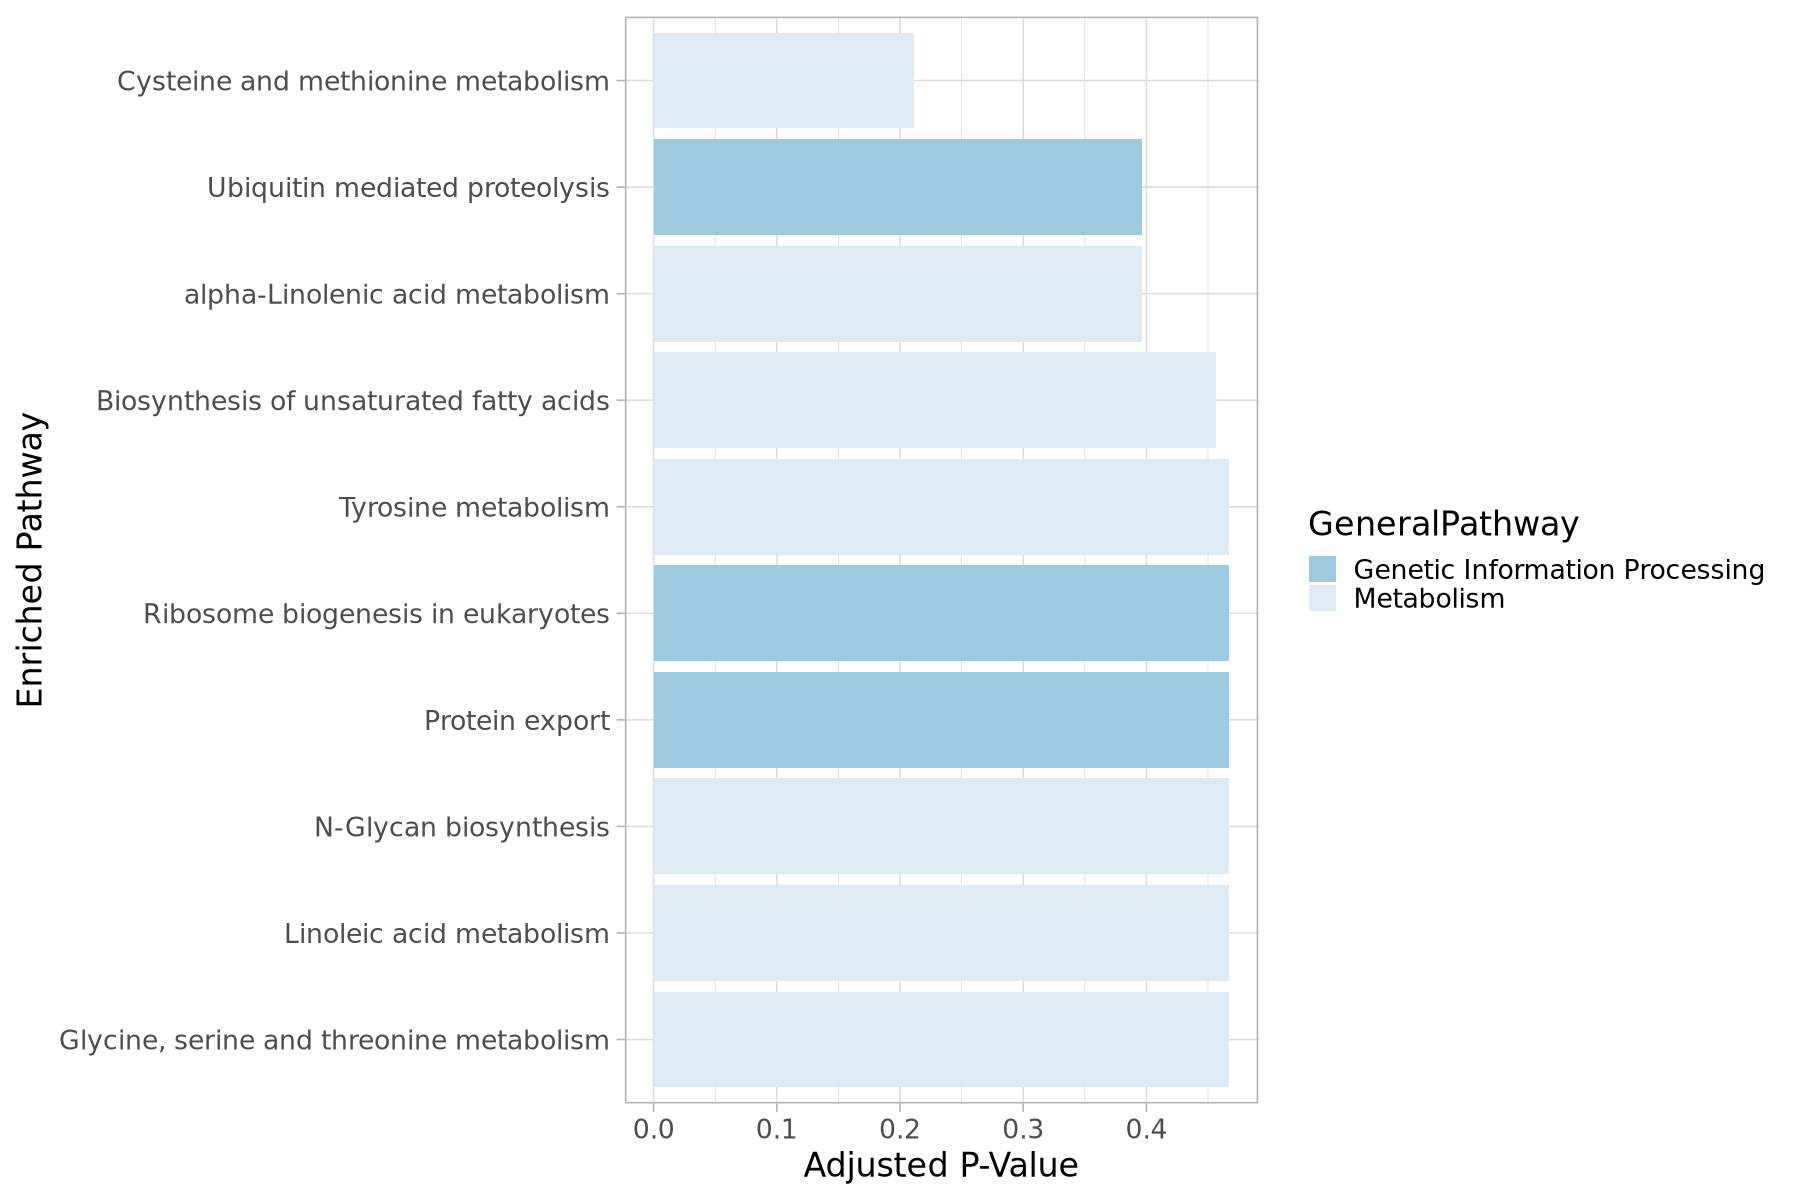

In [42]:
options(repr.plot.width=15, repr.plot.height=10)

HH_top10 <- head(HH_df[order(HH_df$p.adjust), ], 10)
HH_top10

ggplot(HH_top10, aes(x = reorder(Description, -p.adjust), y = p.adjust, fill = GeneralPathway)) +
  geom_bar(stat = "identity") +
  coord_flip() +
geom_vline(xintercept = 0.05,
           col = "gray",
           linetype = 'dashed', 
          linewidth = 10) + # significance threshold line
scale_fill_brewer(palette = 'Blues', direction=-1) +
  labs(y = "Adjusted P-Value",
       x = "Enriched Pathway") +
  theme_light(base_size=20)

In [77]:
HH_top10$Description

[1] "Cysteine and methionine metabolism"      
 [2] "alpha-Linolenic acid metabolism"         
 [3] "Ubiquitin mediated proteolysis"          
 [4] "Biosynthesis of unsaturated fatty acids" 
 [5] "Linoleic acid metabolism"                
 [6] "Ribosome biogenesis in eukaryotes"       
 [7] "Glycine, serine and threonine metabolism"
 [8] "Protein export"                          
 [9] "N-Glycan biosynthesis"                   
[10] "Tyrosine metabolism"

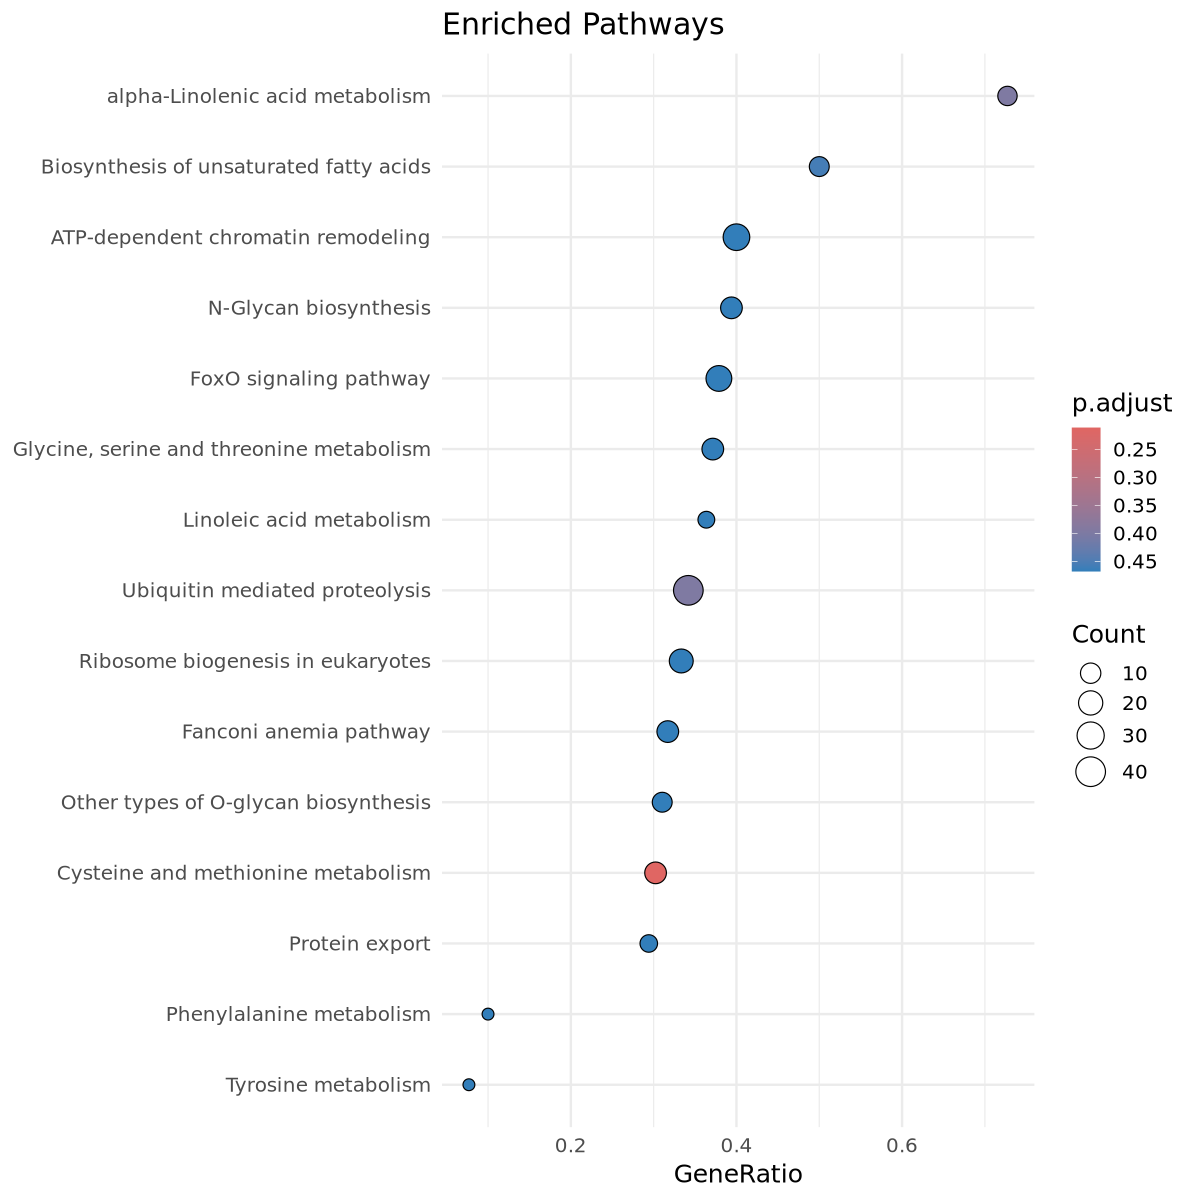

In [43]:
options(repr.plot.width=10, repr.plot.height=10)

HH_kk2@result$Description <- gsub(HH_kk2@result$Description, pattern="\\s-\\sCra.+$", replacement="")

# Create the dot plot
dotplot(HH_kk2, 
        showCategory = 15,  # Number of categories to show
        font.size = 9,      # Font size for labels
        label_format = 100,  # Format for labels (length limit)
        title = "Enriched Pathways") +
  theme_minimal(base_size = 15)  # Optional: change theme for better appearance
